In [1]:
import xarray as xr

In [2]:
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Aurora
the model make twe steps forecasting

In [6]:
#f_root = Path("/discover/nobackup/jli30/qefm-core/qefm/models/src/FMAurora")
f_root = Path("/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora")
ofile1 = "pred_01.nc"
ofile2 = "pred_02.nc"

[PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_00.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_01.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_02.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_03.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_04.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_05.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_06.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_07.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_08.nc'),
 PosixPath('/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora/2024-12-01/pred_09.nc'),


In [40]:
ds1 = xr.open_dataset((f_root/ofile1))
ds2 = xr.open_dataset((f_root/ofile2))
ds = xr.concat([ds1, ds2], dim="time")

In [41]:
ds

<xarray.Dataset> Size: 597MB
Dimensions:       (time: 2, batch: 1, history: 1, latitude: 720,
                   longitude: 1440, level: 13)
Coordinates:
  * latitude      (latitude) float32 3kB 90.0 89.75 89.5 ... -89.25 -89.5 -89.75
  * longitude     (longitude) float32 6kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * time          (time) datetime64[ns] 16B 2024-12-01T12:00:00 2024-12-01T18...
  * level         (level) int64 104B 1000 925 850 700 600 ... 250 200 150 100 50
    rollout_step  (time) int64 16B 2 3
Dimensions without coordinates: batch, history
Data variables:
    surf_2t       (time, batch, history, latitude, longitude) float32 8MB 250...
    surf_10u      (time, batch, history, latitude, longitude) float32 8MB -0....
    surf_10v      (time, batch, history, latitude, longitude) float32 8MB -0....
    surf_msl      (time, batch, history, latitude, longitude) float32 8MB 1.0...
    static_z      (time, latitude, longitude) float32 8MB -1.24 ... 2.716e+04
    static_slt    (time, latitude, longitude) float32 8MB 0.0 0.0 ... 1.0 1.0
    static_lsm    (time, latitude, longitude) float32 8MB 0.0 0.0 ... 1.0 1.0
    atmos_t       (time, batch, history, level, latitude, longitude) float32 108MB ...
    atmos_u       (time, batch, history, level, latitude, longitude) float32 108MB ...
    atmos_v       (time, batch, history, level, latitude, longitude) float32 108MB ...
    atmos_q       (time, batch, history, level, latitude, longitude) float32 108MB ...
    atmos_z       (time, batch, history, level, latitude, longitude) float32 108MB ...

In [8]:
era5_root = '/discover/nobackup/jli30/data/Aurora/2025-01-01-surface-level.nc'
dset = xr.open_dataset(era5_root)
dset

<xarray.Dataset> Size: 66MB
Dimensions:     (valid_time: 4, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 32B 2025-01-01 ... 2025-01-01T18:...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 64B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 17MB ...
    u10         (valid_time, latitude, longitude) float32 17MB ...
    v10         (valid_time, latitude, longitude) float32 17MB ...
    msl         (valid_time, latitude, longitude) float32 17MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-08T20:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [13]:
truth = dset['t2m'].isel(valid_time=2).sel(latitude=slice(90.0, -89.75)).to_numpy().squeeze()
truth.shape

(720, 1440)

In [10]:
pred = ds['surf_2t'].isel(time=0).to_numpy().squeeze()
pred.shape

(720, 1440)

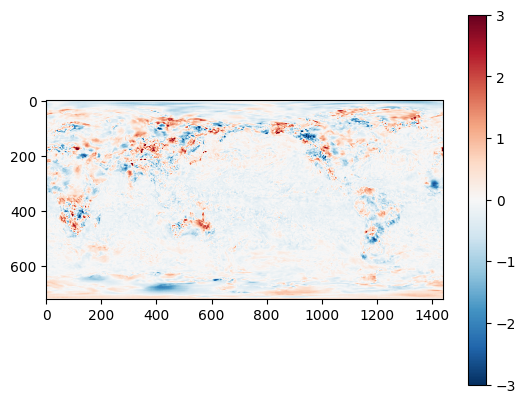

In [23]:
diff = pred-truth
plt.imshow(diff, vmin=-3, vmax=3, cmap='RdBu_r')
plt.colorbar()

In [24]:
diff_flat = diff.flatten()
diff_max = np.ceil(diff_flat.max())
diff_min = np.floor(diff_flat.min())
diff_max, diff_min

(11.0, -7.0)

(array([1.00000e+00, 2.00000e+01, 1.03000e+02, 6.41000e+02, 3.97100e+03,
        2.82400e+04, 5.93625e+05, 3.82299e+05, 2.28860e+04, 4.00500e+03,
        8.04000e+02, 1.54000e+02, 2.60000e+01, 1.30000e+01, 9.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 18 artists>)

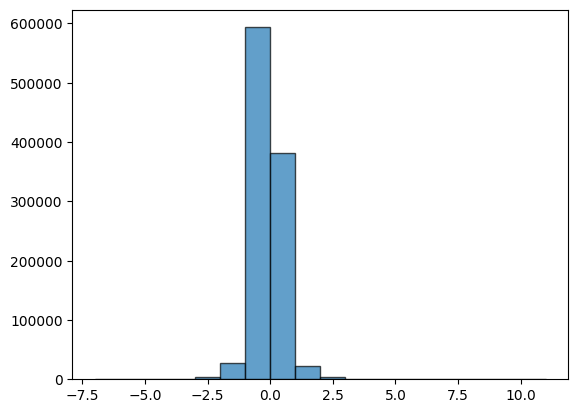

In [27]:
plt.hist(diff_flat, bins=np.arange(diff_min, diff_max+1, 1), edgecolor='black', alpha=0.7)

In [16]:
np.mean(diff)

-0.051515896

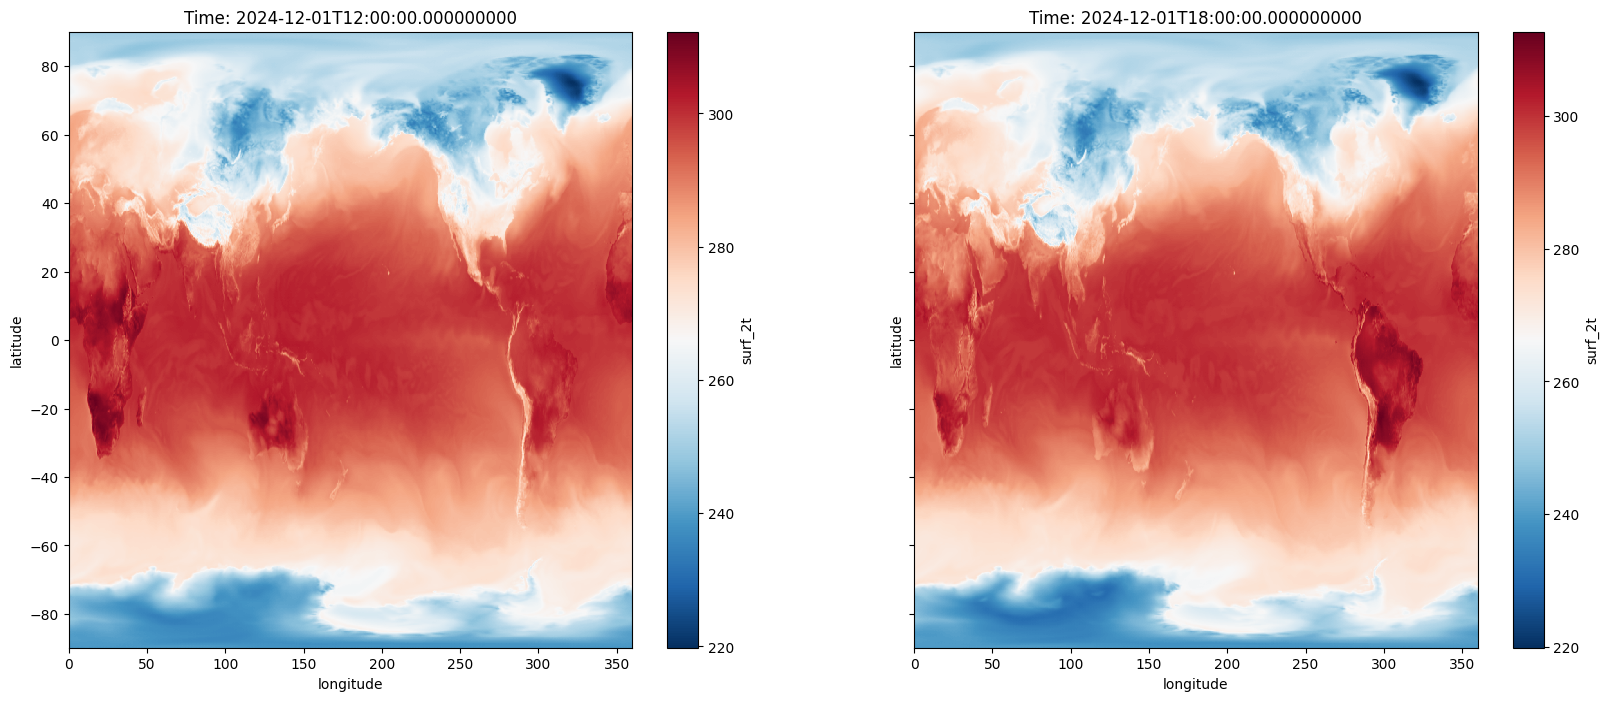

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()
var = "surf_2t"
for i, ax in enumerate(axes):
    ds[var].isel(time=i).squeeze().plot(ax=ax, cmap="RdBu_r")
    ax.set_title(f"Time: {ds.time.values[i]}")

In [7]:
## Plot bias of 2-day

In [27]:
init_date = "2020-01-01"
f_root = Path("/discover/nobackup/projects/QEFM/data/rollout_outputs/FMAurora")
files = sorted(f_root.glob(f"{init_date}/*.nc"))
print(len(files))

10


In [28]:
dset = xr.open_mfdataset(files[:8])
dset

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 8, batch: 1, history: 1, latitude: 720,
                   longitude: 1440, level: 13)
Coordinates:
  * latitude      (latitude) float32 3kB 90.0 89.75 89.5 ... -89.25 -89.5 -89.75
  * longitude     (longitude) float32 6kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * time          (time) datetime64[ns] 64B 2020-01-01T06:00:00 ... 2020-01-03
  * level         (level) int64 104B 1000 925 850 700 600 ... 250 200 150 100 50
    rollout_step  (time) int64 64B 1 2 3 4 5 6 7 8
Dimensions without coordinates: batch, history
Data variables:
    surf_2t       (time, batch, history, latitude, longitude) float32 33MB dask.array<chunksize=(1, 1, 1, 720, 1440), meta=np.ndarray>
    surf_10u      (time, batch, history, latitude, longitude) float32 33MB dask.array<chunksize=(1, 1, 1, 720, 1440), meta=np.ndarray>
    surf_10v      (time, batch, history, latitude, longitude) float32 33MB dask.array<chunksize=(1, 1, 1, 720, 1440), meta=np.ndarray>
    surf_msl      (time, batch, history, latitude, longitude) float32 33MB dask.array<chunksize=(1, 1, 1, 720, 1440), meta=np.ndarray>
    static_z      (time, latitude, longitude) float32 33MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    static_slt    (time, latitude, longitude) float32 33MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    static_lsm    (time, latitude, longitude) float32 33MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    atmos_t       (time, batch, history, level, latitude, longitude) float32 431MB dask.array<chunksize=(1, 1, 1, 13, 720, 1440), meta=np.ndarray>
    atmos_u       (time, batch, history, level, latitude, longitude) float32 431MB dask.array<chunksize=(1, 1, 1, 13, 720, 1440), meta=np.ndarray>
    atmos_v       (time, batch, history, level, latitude, longitude) float32 431MB dask.array<chunksize=(1, 1, 1, 13, 720, 1440), meta=np.ndarray>
    atmos_q       (time, batch, history, level, latitude, longitude) float32 431MB dask.array<chunksize=(1, 1, 1, 13, 720, 1440), meta=np.ndarray>
    atmos_z       (time, batch, history, level, latitude, longitude) float32 431MB dask.array<chunksize=(1, 1, 1, 13, 720, 1440), meta=np.ndarray>

In [29]:
t_root = Path("/discover/nobackup/jli30/data/Aurora")
files = [t_root / f"2020-01-0{i+1}-surface-level.nc" for i in range(3)]
files

[PosixPath('/discover/nobackup/jli30/data/Aurora/2020-01-01-surface-level.nc'),
 PosixPath('/discover/nobackup/jli30/data/Aurora/2020-01-02-surface-level.nc'),
 PosixPath('/discover/nobackup/jli30/data/Aurora/2020-01-03-surface-level.nc')]

In [30]:
dset_true = xr.open_mfdataset(files)
dset_true

<xarray.Dataset> Size: 199MB
Dimensions:     (valid_time: 12, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 96B 2020-01-01 ... 2020-01-03T18:...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 192B dask.array<chunksize=(4,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 50MB dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 50MB dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 50MB dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    msl         (valid_time, latitude, longitude) float32 50MB dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-03T19:47 GRIB to CDM+CF via cfgrib-0.9.1...

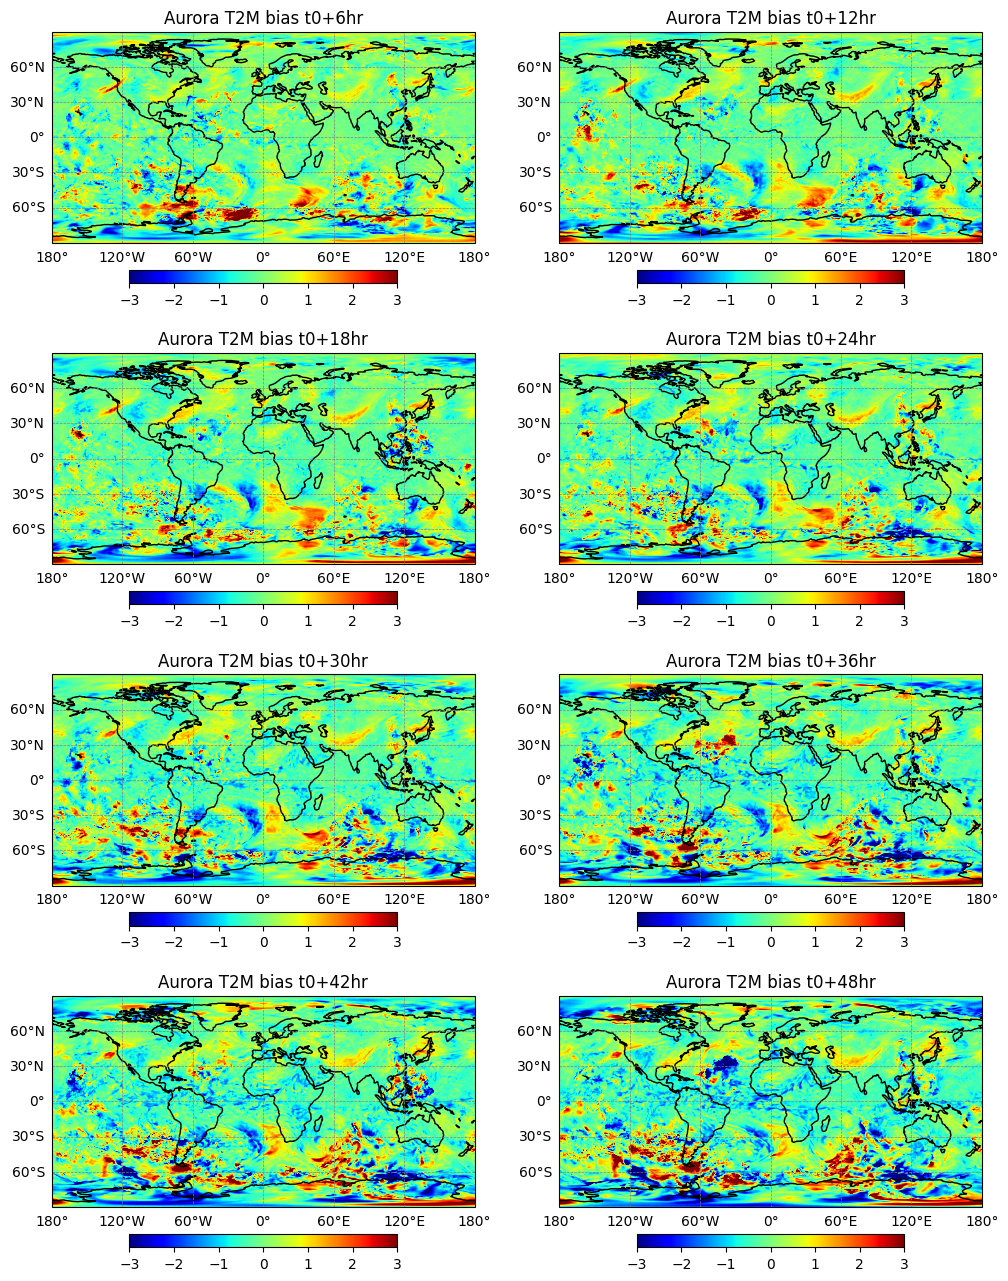

In [35]:
vname = "Aurora T2M"
fig, axes = plt.subplots(4, 2, figsize=(12, 16), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
extent = [-180, 180, -90, 90]
for n in range(8):
    hr = 6*(n+1)
    truth = dset_true['t2m'].isel(valid_time=(n+1)).to_numpy()[:-1,:]
    # try to use climatology as ground truth
    #truth = data['sur_climate'][n, 12].numpy()[:-1, :]
    pred = dset['surf_2t'].isel(time=n).to_numpy().squeeze()
    im = axes[n].imshow(pred-truth, extent=extent, origin='lower', cmap='jet', vmin=-3, vmax=3)
    axes[n].set_title(f"{vname} bias t0+{hr}hr")
    axes[n].coastlines()
    
    gl = axes[n].gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color='gray')
    gl.top_labels = False  
    gl.right_labels = False 
    fig.colorbar(im, ax=axes[n], orientation='horizontal', fraction=0.05, pad=0.1)

# panggu
using 2015-01-01 00:00 as inputs, making one step forecast with chkpt "pangu_weather_24.onnx" (24-hr lapse?)

Variables:  
        surface -- shaped (4,721,1440); MSLP, U10, V10, T2M **in the exact order**  
        upper   -- shaped (5,13,721,1440); Z, Q, T, U and V **in the exact order**

In [29]:
f_root = Path("/discover/nobackup/jli30/qefm-core/qefm/models/src/FMPangu/Pangu-Weather-pytorch/output_data")
file = "output_surface.npy"

In [30]:
arr = np.load((f_root / file))
arr.shape

(4, 721, 1440)

(-0.5, 1439.5, 720.5, -0.5)

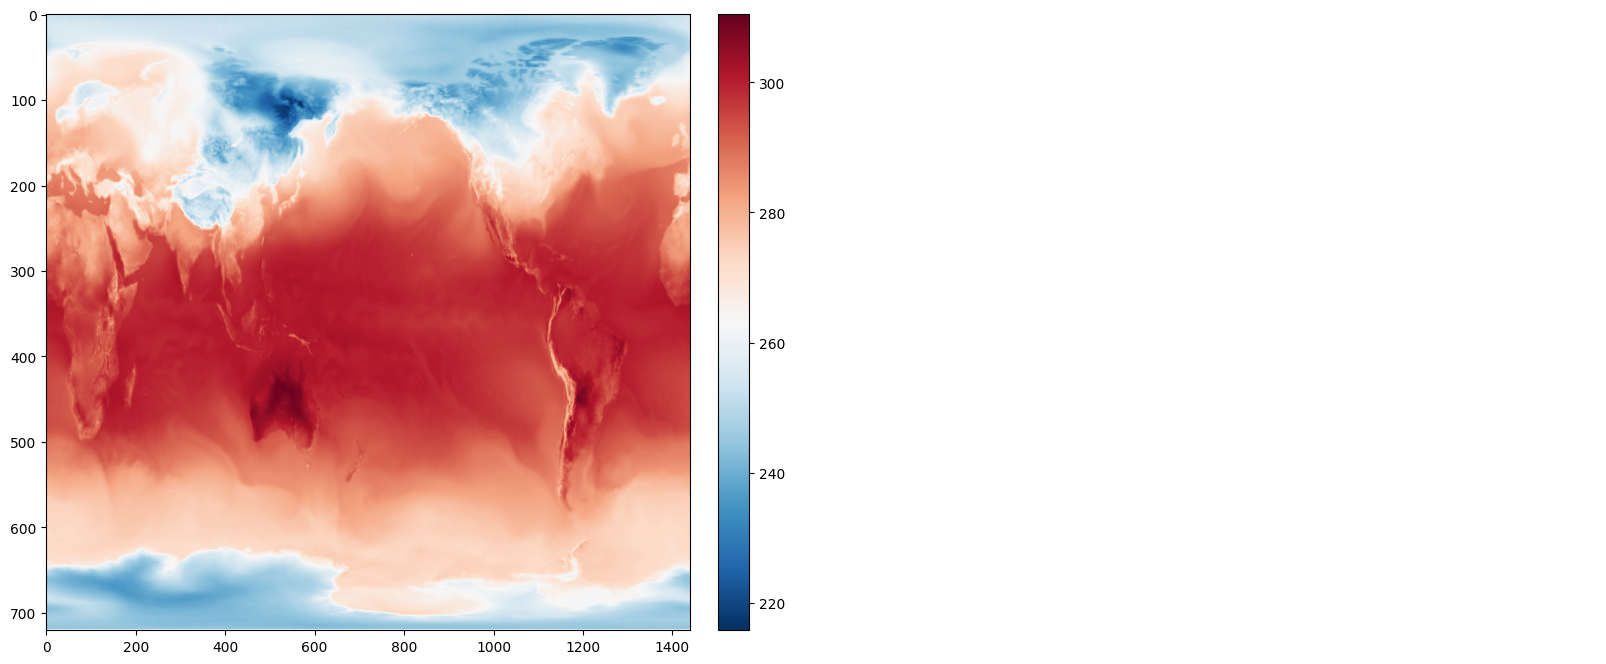

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharex=True, sharey=True)

im = axes[0].imshow(arr[3,...].squeeze(), cmap="RdBu_r", aspect="auto")
cbar = fig.colorbar(im, ax=axes[0], orientation="vertical", fraction=0.046, pad=0.04)

axes[1].axis('off')

## FourCastNet

In [25]:

file = "/discover/nobackup/jli30/QEFM/qefm-core/qefm/models/src/FMFourCastNet/FourCastNet/out/20250228/autoregressive_predictions_2m_temperature_vis.h5"
file = "/discover/nobackup/projects/QEFM/qefm-core/qefm/models/src/FMFourCastNet/FourCastNet/out/20241229_0917/autoregressive_predictions_z500_vis.h5"

In [26]:
import h5py

In [27]:
with h5py.File(file, "r") as f:
    # List datasets inside the file
    print(list(f.keys()))
    #data = f["predicted"][:]

['acc', 'acc_coarse', 'acc_coarse_unweighted', 'acc_land', 'acc_sea', 'acc_unweighted', 'ground_truth', 'predicted', 'rmse', 'rmse_coarse']


In [28]:
fh = h5py.File(file, "r")


In [29]:
dataset =fh['predicted']

In [30]:
print(dataset.attrs.keys())

<KeysViewHDF5 []>


In [31]:
dataset.shape

(1, 41, 20, 720, 1440)

In [32]:
import matplotlib.pyplot as plt

In [37]:
t2m = dataset[0,7,2].squeeze()

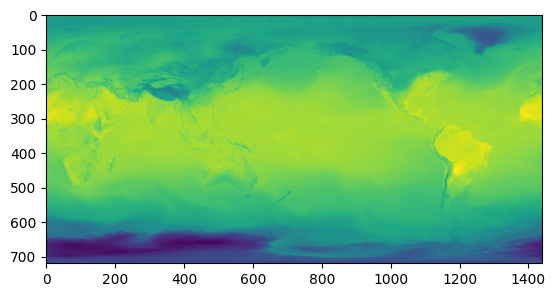

In [38]:
plt.imshow(t2m)

In [51]:
file1 = "/discover/nobackup/projects/QEFM/qefm-core/qefm/models/checkpoints/FMFourCastNet/ccai_demo/data/FCN_ERA5_data_v0/out_of_sample/2018.h5"
fh = h5py.File(file1, 'r')


In [55]:
print(fh['fields'].shape)

(40, 21, 721, 1440)


In [70]:
print(fh['fields'][0,2])

[[270.3673  270.3673  270.3673  ... 270.3673  270.3673  270.3673 ]
 [270.3773  270.3773  270.3773  ... 270.3773  270.3773  270.3773 ]
 [270.3713  270.3713  270.3713  ... 270.36932 270.3713  270.3713 ]
 ...
 [226.65329 226.65129 226.6493  ... 226.66525 226.66127 226.65727]
 [227.1297  227.1297  227.1277  ... 227.13568 227.13368 227.1317 ]
 [227.56425 227.56425 227.56425 ... 227.56425 227.56425 227.56425]]


In [67]:
file2 = "/discover/nobackup/jli30/data/FNO/out_of_sample/oct_2024_19_21.h5"
fhh = h5py.File(file2, 'r')


In [68]:
fhh.keys()

<KeysViewHDF5 ['fields']>

In [61]:
fhh['fields'].shape

(20, 20, 721, 1440)

In [69]:
fhh['fields'][0, 2]

array([[266.82462, 266.82462, 266.82462, ..., 266.82462, 266.82462,
        266.82462],
       [267.11758, 267.11758, 267.11758, ..., 267.11758, 267.11758,
        267.11758],
       [267.23282, 267.23087, 267.23087, ..., 267.23087, 267.23087,
        267.23087],
       ...,
       [224.2172 , 224.21915, 224.22305, ..., 224.20547, 224.21133,
        224.21329],
       [224.20547, 224.20743, 224.20938, ..., 224.19766, 224.19962,
        224.20352],
       [223.47696, 223.47696, 223.47696, ..., 223.47696, 223.47696,
        223.47696]], dtype=float32)